In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc


In [9]:
prob = "MuJoCoPusher"
window_size = 10
nb_episodes = 300


In [10]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std


In [11]:
base_path = f"C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\Results\\{prob}"



## Plot subfigures

In [12]:
MPU_dict_auc_mean = {}
MPU_dict_auc_std = {}


QRNN-ASNN-PF: AUC = -22326.33 ± 1016.85
QRNN-basic-PF: AUC = -23947.29 ± 1158.23
QRNN-rnd-PF: AUC = -27961.47 ± 1198.62
QRNN-RS: AUC = -36675.42 ± 1267.56
50NN-ASNN-PF: AUC = -22829.52 ± 1178.48
50NN-rnd-PF: AUC = -28478.16 ± 1169.81
50NN-RS: AUC = -37035.59 ± 1175.64
MSENN-ASNN-PF: AUC = -24012.06 ± 636.33
MSENN-basic-PF: AUC = -25835.86 ± 1053.45
MSENN-rnd-PF: AUC = -29797.02 ± 1419.16
MSENN-RS: AUC = -37654.83 ± 978.24
############################################################# 

QRNN-rnd-CEM: AUC = -18810.58 ± 1371.67
50NN-ASNN-CEM: AUC = -18111.12 ± 2195.42
50NN-rnd-CEM: AUC = -18981.87 ± 1614.89
len(mean_rewards)  300 

len(std_rewards)  300 

MSENN-rnd-CEM: AUC = -20267.02 ± 1002.27
############################################################# 

A2C: AUC = -28772.36 ± 342.34
PPO: AUC = -31831.45 ± 418.04
DDPG: AUC = -14633.55 ± 426.24
SAC: AUC = -18987.98 ± 104.66
TD3: AUC = -14702.68 ± 894.14
TQC: AUC = -19585.74 ± 151.78


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\Results\\MuJoCoPusher\\MuJoCoPusher_MPPI_results_June25.npz'

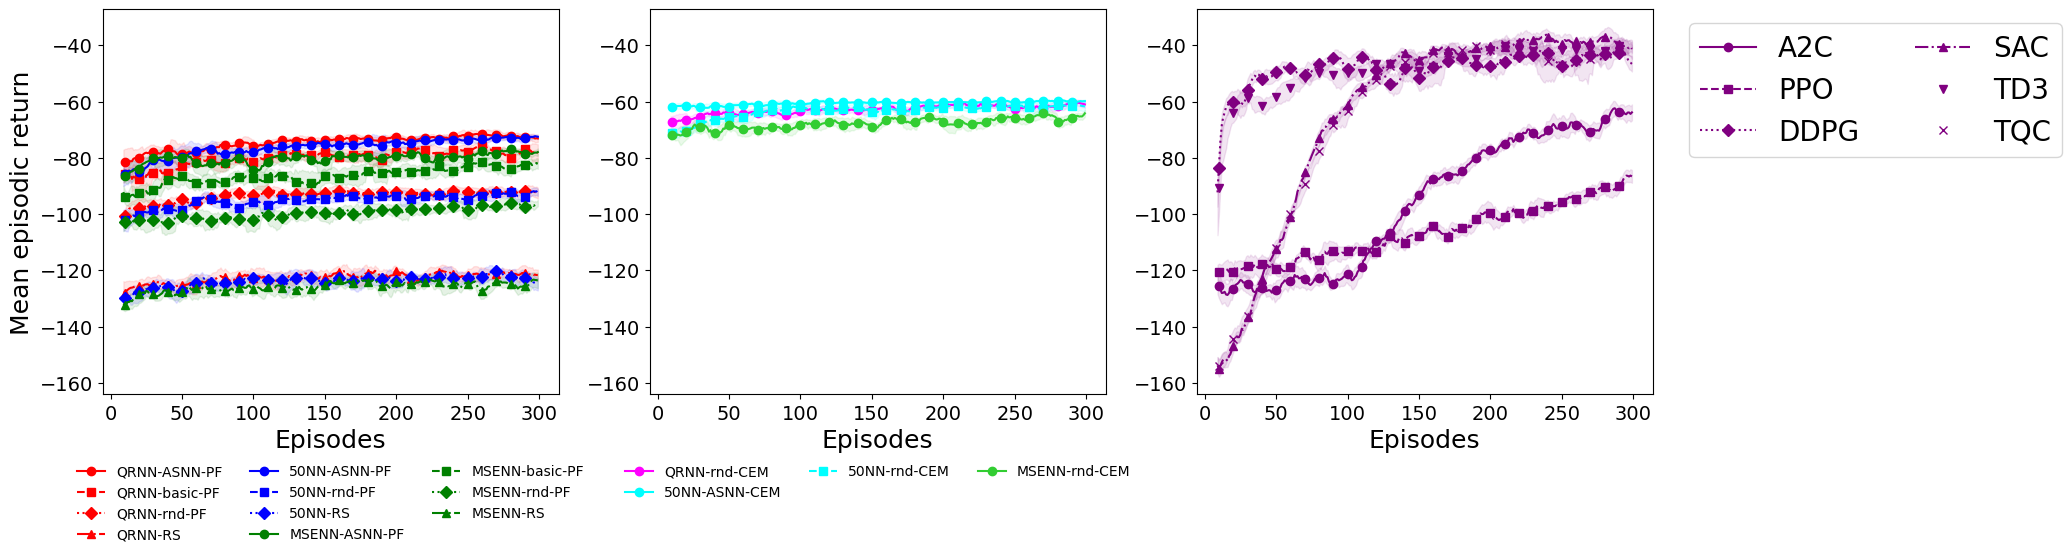

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
plt.rcParams.update({'font.size': 20})
for i, ax in enumerate(axs):
    # ax.plot([1, 2, 3], [j*(i+1) for j in [1, 4, 9]])
    # ax.set_title(f"Plot {i+1}", fontsize=20)
    ax.set_xlabel("Episodes", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.set_tick_params(labelleft=True)

axs[0].set_ylabel("Mean episodic return", fontsize=18)

QRNN = {'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASNN_mid_July28.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_July28.npz',
    'QRNN-rnd-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_July28.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_July28.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MPU_dict_auc_mean[label] = auc_mean
    MPU_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

FiftyNN = {'50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASNN_mid_July28.npz',
    # '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_July28.npz',
    '50NN-rnd-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_July28.npz',
    '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_July28.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MPU_dict_auc_mean[label] = auc_mean
    MPU_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

MSENN = {'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASNN_mid_July28.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_July28.npz',
    'MSENN-rnd-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_July28.npz',
    'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_July28.npz',}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MPU_dict_auc_mean[label] = auc_mean
    MPU_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# from matplotlib.lines import Line2D

# custom_legend = [
#     Line2D([0], [0], color='red', lw=2, label='QRNN'),
#     Line2D([0], [0], color='blue', lw=2, label='50NN'),
#     Line2D([0], [0], color='green', lw=2, label='MSENN'),
#     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASNN'),
#     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
#     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# ]

# axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               ncol=3, fontsize=10, frameon=False)


###########################################################

print("############################################################# \n")

QRNN_CEM = {
    # 'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASNN_mid_July28_CEM.npz',
    # 'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_July28_CEM.npz',
    'QRNN-rnd-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_July28_CEM.npz',}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MPU_dict_auc_mean[label] = auc_mean
    MPU_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################################################

FiftyNN_CEM = {
    '50NN-ASNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASNN_mid_July28_CEM.npz',
    # '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_July28_CEM.npz',
    '50NN-rnd-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_July28_CEM.npz'}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MPU_dict_auc_mean[label] = auc_mean
    MPU_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


########################################################

MSENN_CEM = {
    # 'MSENN-ASNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASNN_mid_July28_CEM.npz',
    # 'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_July28_CEM.npz',
    'MSENN-rnd-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_July28_CEM.npz',}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    print("len(mean_rewards) ", len(mean_rewards), "\n")
    print("len(std_rewards) ", len(std_rewards), "\n")
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MPU_dict_auc_mean[label] = auc_mean
    MPU_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

#############################################################

print("############################################################# \n")

# DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\sb3\\{prob}_DQN_results.npz',
#     'IV-DQN': f'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\sb3\\{prob}_IV_DQN_results.npz',
#     'QR-DQN': f'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\sb3\\{prob}_QR_DQN_results.npz',
#     }

# color = 'black'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in DQN_methods.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     # print("mean_rewards ", data['ep[]'], "\n")
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[2].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[2].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
# prob_RL = "Reacher"
RL_methods = {'A2C': f'{base_path}\\{prob}_A2C_results.npz',
    'PPO': f'{base_path}\\{prob}_PPO_results.npz',
    'DDPG': f'{base_path}\\{prob}_DDPG_results.npz',
    'SAC': f'{base_path}\\{prob}_SAC_results.npz',
    'TD3': f'{base_path}\\{prob}_TD3_results.npz',
    'TQC': f'{base_path}\\{prob}_TQC_results.npz',
    
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MPU_dict_auc_mean[label] = auc_mean
    MPU_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

##################################################

########################
# prob_Control = "PandaReachDense"
Control_methods = {
    'MPPI': f'{base_path}\\{prob}_MPPI_results_July28.npz',
    'CEM': f'{base_path}\\{prob}_CEM_results_July28.npz',
    'iCEM': f'{base_path}\\{prob}_iCEM_results_July28.npz',
    # 'GP-MPC': f'{base_path}\\{prob}_GP-MPC_results.npz',
    # 'PETS-CEM': f'{base_path}\\{prob}_PETS_CEM_results.npz',
    
    # 'MPPI': f'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\MPPI\\{prob}_MPPI_results.npz',
    # 'GP-MPC': f'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\GP_MPC\\{prob}_GP-MPC_results.npz',
    # # 'iLQR': f'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\ilqr_s\\{prob_RL}_iLQR_results.npz',
    # # 'iLQR': f'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\ilqr\\{prob_RL}_iLQR_results.npz',
    # # 'PETSCEM': f'C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\sb3\\CartPole_PPO_results.npz'

    # # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_A2C_results.npz',
    # # # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_DDPG_results.npz',
    # # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_PPO_results.npz',
    # # # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_SAC_results.npz',
    # # # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_TD3_results.npz',
    # # # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_TQC_results.npz',
    }

color_MPPI = 'orange'
color_CEM = 'deeppink'
color_iCEM = 'darkviolet'
color_GPMPC = 'Olive'
color_iLQR = 'blueviolet'
color_PETSCEM = 'brown'

#########################
MPPI_data = np.load(Control_methods['MPPI'])
mean_returns_MPPI = MPPI_data['mean_rewards'][:nb_episodes]
std_returns_MPPI = MPPI_data['std_rewards'][:nb_episodes]
# Smooth the data
smoothed_mean_MPPI = pd.Series(mean_returns_MPPI).rolling(window=window_size).mean()
smoothed_std_MPPI = pd.Series(std_returns_MPPI).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(MPPI_data, nb_episodes)
print(f"MPPI: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
MPU_dict_auc_mean['MPPI'] = auc_mean
MPU_dict_auc_std['MPPI'] = auc_std

#########################
GPMPC_data = np.load(Control_methods['GP-MPC'])
mean_returns_GPMPC = GPMPC_data['mean_rewards'][:nb_episodes]
std_returns_GPMPC = GPMPC_data['std_rewards'][:nb_episodes]
# Smooth the data
smoothed_mean_GPMPC = pd.Series(mean_returns_GPMPC).rolling(window=window_size).mean()
smoothed_std_GPMPC = pd.Series(std_returns_GPMPC).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(GPMPC_data, nb_episodes)
print(f"GP-MPC: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
MPU_dict_auc_mean['GP-MPC'] = auc_mean
MPU_dict_auc_std['GP-MPC'] = auc_std

#########################
CEM_data = np.load(Control_methods['CEM'])
mean_returns_CEM = CEM_data['mean_rewards'][:nb_episodes]
std_returns_CEM = CEM_data['std_rewards'][:nb_episodes]

# Smooth the data
smoothed_mean_CEM = pd.Series(mean_returns_CEM).rolling(window=window_size).mean()
smoothed_std_CEM = pd.Series(std_returns_CEM).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(CEM_data, nb_episodes)
print(f"CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
MPU_dict_auc_mean['CEM'] = auc_mean
MPU_dict_auc_std['CEM'] = auc_std

#########################
iCEM_data = np.load(Control_methods['iCEM'])
mean_returns_iCEM = iCEM_data['mean_rewards'][:nb_episodes]
std_returns_iCEM = iCEM_data['std_rewards'][:nb_episodes]

# Smooth the data
smoothed_mean_iCEM = pd.Series(mean_returns_iCEM).rolling(window=window_size).mean()
smoothed_std_iCEM = pd.Series(std_returns_iCEM).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(iCEM_data, nb_episodes)
print(f"iCEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
MPU_dict_auc_mean['iCEM'] = auc_mean
MPU_dict_auc_std['iCEM'] = auc_std


# iLQR_data = np.load(Control_methods['iLQR'])
# mean_returns_iLQR = iLQR_data['mean_rewards'][:300]
# std_returns_iLQR = iLQR_data['std_rewards'][:300]
# # Smooth the data
# smoothed_mean_iLQR = pd.Series(mean_returns_iLQR).rolling(window=window_size).mean()
# smoothed_std_iLQR = pd.Series(std_returns_iLQR).rolling(window=window_size).std()

#########################
PETSCEM_data = np.load(Control_methods['PETS-CEM'])
mean_returns_PETSCEM = PETSCEM_data['mean_rewards'][:300]
std_returns_PETSCEM = PETSCEM_data['std_rewards'][:300]
# Smooth the data
smoothed_mean_PETSCEM = pd.Series(mean_returns_PETSCEM).rolling(window=window_size).mean()
smoothed_std_PETSCEM = pd.Series(std_returns_PETSCEM).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(PETSCEM_data, nb_episodes)
print(f"PETS-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
MPU_dict_auc_mean['PETS-CEM'] = auc_mean
MPU_dict_auc_std['PETS-CEM'] = auc_std

plt.plot(smoothed_mean_MPPI, label='MPPI', color=color_MPPI)
plt.fill_between(range(len(smoothed_mean_MPPI)), 
                 smoothed_mean_MPPI - smoothed_std_MPPI, 
                 smoothed_mean_MPPI + smoothed_std_MPPI, 
                 color=color_MPPI, alpha=0.1)

#########################
plt.plot(smoothed_mean_CEM, label='CEM', color=color_CEM)
plt.fill_between(range(len(smoothed_mean_CEM)), 
                 smoothed_mean_CEM - smoothed_std_CEM, 
                 smoothed_mean_CEM + smoothed_std_CEM, 
                 color=color_CEM, alpha=0.1)

#########################
plt.plot(smoothed_mean_iCEM, label='iCEM', color=color_iCEM)
plt.fill_between(range(len(smoothed_mean_iCEM)), 
                 smoothed_mean_iCEM - smoothed_std_iCEM, 
                 smoothed_mean_iCEM + smoothed_std_iCEM, 
                 color=color_iCEM, alpha=0.1)

#########################
# plt.plot(smoothed_mean_GPMPC, label='GP-MPC', color=color_GPMPC)
# plt.fill_between(range(len(smoothed_mean_GPMPC)), 
#                  smoothed_mean_GPMPC - smoothed_std_GPMPC, 
#                  smoothed_mean_GPMPC + smoothed_std_GPMPC, 
#                  color=color_GPMPC, alpha=0.1)

# #########################
# plt.plot(smoothed_mean_PETSCEM, label='PETS-CEM', color=color_PETSCEM)
# plt.fill_between(range(len(smoothed_mean_PETSCEM)), 
#                  smoothed_mean_PETSCEM - smoothed_std_PETSCEM, 
#                  smoothed_mean_PETSCEM + smoothed_std_PETSCEM, 
#                  color=color_PETSCEM, alpha=0.1)



##################################################
markers = ['o', 's', 'D', '^', 'v', 'x', '*']
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns

# 50NN_ASNN_CEM
color_50NN_ASNN_CEM = 'aqua'
marker_50NN_ASNN_CEM = markers[0]
linestyle_50NN_ASNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_50NN_ASNN_mid_May12_CEM.npz',)
mean_rewards_50NN_ASNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_50NN_ASNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"50NN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_50NN_ASNN_CEM = pd.Series(mean_rewards_50NN_ASNN_CEM).rolling(window=window_size).mean()
smoothed_std_50NN_ASNN_CEM = pd.Series(std_rewards_50NN_ASNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_50NN_ASNN_CEM, 
            label="50NN-ASNN-CEM", 
            color=color_50NN_ASNN_CEM,
            marker=marker_50NN_ASNN_CEM,
            linestyle=linestyle_50NN_ASNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_50NN_ASNN_CEM)), 
                    smoothed_mean_50NN_ASNN_CEM - smoothed_std_50NN_ASNN_CEM, 
                    smoothed_mean_50NN_ASNN_CEM + smoothed_std_50NN_ASNN_CEM, 
                    color=color_50NN_ASNN_CEM, alpha=0.1)


# QRNN_ASNN_CEM
color_QRNN_ASNN_CEM = 'magenta'
marker_QRNN_ASNN_CEM = markers[0]
linestyle_QRNN_ASNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_ASNN_mid_June25_CEM.npz',)
mean_rewards_QRNN_ASNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_ASNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")


# Smooth the data
smoothed_mean_QRNN_ASNN_CEM = pd.Series(mean_rewards_QRNN_ASNN_CEM).rolling(window=window_size).mean()
smoothed_std_QRNN_ASNN_CEM = pd.Series(std_rewards_QRNN_ASNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_ASNN_CEM, 
            label="QRNN-ASNN-CEM", 
            color=color_QRNN_ASNN_CEM,
            marker=marker_QRNN_ASNN_CEM,
            linestyle=linestyle_QRNN_ASNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_ASNN_CEM)), 
                    smoothed_mean_QRNN_ASNN_CEM - smoothed_std_QRNN_ASNN_CEM, 
                    smoothed_mean_QRNN_ASNN_CEM + smoothed_std_QRNN_ASNN_CEM, 
                    color=color_QRNN_ASNN_CEM, alpha=0.1)

# MSENN_ASNN_CEM
color_MSENN_ASNN_CEM = 'limegreen'
marker_MSENN_ASNN_CEM = markers[0]
linestyle_MSENN_ASNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_MSENN_ASNN_mid_June25_CEM.npz',)
mean_rewards_MSENN_ASNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_MSENN_ASNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"MSENN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_MSENN_ASNN_CEM = pd.Series(mean_rewards_MSENN_ASNN_CEM).rolling(window=window_size).mean()
smoothed_std_MSENN_ASNN_CEM = pd.Series(std_rewards_MSENN_ASNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_MSENN_ASNN_CEM, 
            label="MSENN-ASNN-CEM", 
            color=color_MSENN_ASNN_CEM,
            marker=marker_MSENN_ASNN_CEM,
            linestyle=linestyle_MSENN_ASNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_MSENN_ASNN_CEM)), 
                    smoothed_mean_MSENN_ASNN_CEM - smoothed_std_MSENN_ASNN_CEM, 
                    smoothed_mean_MSENN_ASNN_CEM + smoothed_std_MSENN_ASNN_CEM, 
                    color=color_MSENN_ASNN_CEM, alpha=0.1)



# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)




In [ ]:
import json

# writing dictionary to a file as JSON
with open('C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\AUC_data\\MPU_auc_mean.json', 'w') as f:
    json.dump(MPU_dict_auc_mean, f)

with open('C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\AUC_data\\MPU_auc_std.json', 'w') as f:
    json.dump(MPU_dict_auc_std, f)


In [ ]:
sorted_dict = dict(sorted(MPU_dict_auc_mean.items(), key=lambda item: item[1], reverse=True)[:15])
sorted_dict


{'QRNN-ASNN-CEM': -1926.0273835870596,
 '50NN-ASNN-CEM': -2228.833725232924,
 'DDPG': -2722.2878155,
 'MSENN-ASNN-CEM': -2819.563082800914,
 'QRNN-basic-CEM': -3075.657081187339,
 'TD3': -3133.2187608333334,
 '50NN-basic-CEM': -3343.2889644631287,
 'MSENN-basic-CEM': -3629.8834764501967,
 'PETS-CEM': -3715.0124114992736,
 'QRNN-ASNN-PF': -3768.781599242431,
 'MPPI': -3871.1006851343714,
 '50NN-ASNN-PF': -4209.753451922188,
 'QRNN-rnd-CEM': -4367.640831158767,
 '50NN-rnd-CEM': -4978.755857071129,
 'MSENN-ASNN-PF': -5008.591517912054}

In [ ]:
MPU_dict_auc_mean, MPU_dict_auc_std


({'QRNN-ASNN-PF': -3768.781599242431,
  'QRNN-basic-PF': -7735.498226070221,
  'QRNN-rnd-PF': -7878.763015859821,
  'QRNN-RS': -9420.253919836878,
  '50NN-ASNN-PF': -4209.753451922188,
  '50NN-basic-PF': -5183.742544134214,
  '50NN-rnd-PF': -8898.675193245354,
  '50NN-RS': -9704.820745466157,
  'MSENN-ASNN-PF': -5008.591517912054,
  'MSENN-basic-PF': -8340.40145490864,
  'MSENN-rnd-PF': -8996.693850130348,
  'MSENN-RS': -10216.218865123812,
  'QRNN-ASNN-CEM': -1926.0273835870596,
  'QRNN-basic-CEM': -3075.657081187339,
  'QRNN-rnd-CEM': -4367.640831158767,
  '50NN-ASNN-CEM': -2228.833725232924,
  '50NN-basic-CEM': -3343.2889644631287,
  '50NN-rnd-CEM': -4978.755857071129,
  'MSENN-ASNN-CEM': -2819.563082800914,
  'MSENN-basic-CEM': -3629.8834764501967,
  'MSENN-rnd-CEM': -5253.120350469421,
  'A2C': -20708.680821833335,
  'PPO': -17156.6530305,
  'DDPG': -2722.2878155,
  'SAC': -5031.525116833333,
  'TD3': -3133.2187608333334,
  'TQC': -5096.243394666667,
  'MPPI': -3871.1006851343714,

In [ ]:
for key, value in MPU_dict_auc_mean.items():
    print(f"{key}: {value:.2f} ± {MPU_dict_auc_std[key]:.2f}")
    

QRNN-ASNN-PF: -3768.78 ± 1095.11
QRNN-basic-PF: -7735.50 ± 1740.14
QRNN-rnd-PF: -7878.76 ± 1144.03
QRNN-RS: -9420.25 ± 392.20
50NN-ASNN-PF: -4209.75 ± 1935.39
50NN-basic-PF: -5183.74 ± 540.23
50NN-rnd-PF: -8898.68 ± 1412.97
50NN-RS: -9704.82 ± 624.40
MSENN-ASNN-PF: -5008.59 ± 2236.41
MSENN-basic-PF: -8340.40 ± 1325.34
MSENN-rnd-PF: -8996.69 ± 1095.72
MSENN-RS: -10216.22 ± 946.98
QRNN-ASNN-CEM: -1926.03 ± 336.28
QRNN-basic-CEM: -3075.66 ± 195.50
QRNN-rnd-CEM: -4367.64 ± 934.68
50NN-ASNN-CEM: -2228.83 ± 497.77
50NN-basic-CEM: -3343.29 ± 268.90
50NN-rnd-CEM: -4978.76 ± 1246.09
MSENN-ASNN-CEM: -2819.56 ± 241.31
MSENN-basic-CEM: -3629.88 ± 293.76
MSENN-rnd-CEM: -5253.12 ± 1120.96
A2C: -20708.68 ± 2890.80
PPO: -17156.65 ± 106.14
DDPG: -2722.29 ± 91.03
SAC: -5031.53 ± 61.38
TD3: -3133.22 ± 43.77
TQC: -5096.24 ± 5.07
MPPI: -3871.10 ± 571.40
GP-MPC: -12552.08 ± 163.47
CEM: -15022.86 ± 684.61
iCEM: -25154.36 ± 497.51
PETS-CEM: -3715.01 ± 1150.74
